## **Os desmatamentos na Floresta Amazônica estão diminuindo?**

### **Uma análise exploratória dos dados retirados do INPE (Instituto Nacional de Pesquisa Espaciais) de 1999 até 2019**


Sempre ouvimos noticiários informarem porcentagens e comparações dos desmatamentos e incêndios no Brasil entre os anos passados e como não entendemos muito bem os números apresentados apenas aceitamos que está cada vez pior no cenário, mas o que os dados realmente nos dizem? Quais épocas acontecem com mais frequência? Em quais estados do Brasil ocorrem?

Graças aos dados postados no Kaggle pela Mariana Boger podemos responder à essas questões (fonte: https://www.kaggle.com/mbogernetto/brazilian-amazon-rainforest-degradation), bora ver?

## Introdução

A **Floresta Amazônica** é considerada a maior floresta tropical do mundo e com uma vasta biodiversidade. Além disso, ela faz parte do bioma Amazônia, o maior dos seis biomas brasileiros.

Ela corresponde a **53%** das florestas tropicais que ainda existem no mundo, por isso sua conservação é debatida em âmbito internacional por conta de sua **importância ecológica**.

### **Onde está localizada?**

A Floresta Amazônica fica localizada na região norte da América do Sul, e abrange os estados do **Amazonas, Acre, Amapá, Rondônia, Pará e Roraima** e uma parte dela se expande para alguns países vizinhos como Peru, Colômbia, Venezuela, Equador, Bolívia, Guiana, Suriname e Guiana Francesa.

### **Ameaças ambientais na Floresta Amazônica**


Muitos problemas ambientais afetam a Floresta Amazônica, os principais são: desmatamento, queimadas, criação de pastos, disputa de terras, assentamentos humanos, caça e pesca ilegal entre outras... Nesse caso falaremos apenas do desmatamento e das queimadas.

 ![Floresta Amazônica em chamas](http://cdn.brasildefato.com.br/media/0c05275c8089f8c180ef31c5f81bba8e.jpg)

**Primeiro vamos começar importando as bibliotecas para visualização dos gráficos e depois vamos importar os arquivos csv "INPE_Brazilian_Amazon_Fires" e "def_area_2004-2019"**

In [1]:
conda install -c plotly python-kaleido

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
# importando as bibliotecas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
from plotly.subplots import make_subplots
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/brazilian-amazon-rainforest-degradation/el_nino_la_nina_1999_2019.csv
/kaggle/input/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv
/kaggle/input/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv


In [3]:
# dados de incêndios da floresta amazônica no Brasil de 1999 a 2019
floresta = pd.read_csv('/kaggle/input/brazilian-amazon-rainforest-degradation/inpe_brazilian_amazon_fires_1999_2019.csv', encoding='LATIN1')

# dados do desmatamento no Brasil de 2004 a 2019
desmatado = pd.read_csv('../input/brazilian-amazon-rainforest-degradation/def_area_2004_2019.csv', encoding='LATIN1')

## **Dados da area desmatada**

Vamos analizar quais colunas vamos trabalhar nesse conjunto de dados.

In [4]:
desmatado.head()

,ï»¿Ano/Estados,AC,AM,AP,MA,MT,PA,RO,RR,TO,AMZ LEGAL
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


Conforme observamos temos as colunas representando todos os estados do norte do Brasil, os anos e a somatória total da área desmatada (as linhas representam a área em km²), porém quero renomeá-las para ficar mais fácil de compreender.

In [5]:
# renomeado algumas colunas para melhor entender os dados
desmatado.rename(
    {
    'ï»¿Ano/Estados':'Anos',
    'AC':'Acre',
    'AM': 'Amazonas',
    'AP': 'Amapa',
    'MA':'Maranhao',
    'MT':'Mato Grosso',
    'PA':'Para',
    'RO':'Rondonia',
    'RR':'Roraima',
    'TO':'Tocantins',
    'AMZ LEGAL':'Total'}, axis=1, inplace=True)

desmatado.head()

,Anos,Acre,Amazonas,Amapa,Maranhao,Mato Grosso,Para,Rondonia,Roraima,Tocantins,Total
0,2004,728,1232,46,755,11814,8870,3858,311,158,27772
1,2005,592,775,33,922,7145,5899,3244,133,271,19014
2,2006,398,788,30,674,4333,5659,2049,231,124,14286
3,2007,184,610,39,631,2678,5526,1611,309,63,11651
4,2008,254,604,100,1271,3258,5607,1136,574,107,12911


Pronto! Agora podemos começar as análises:

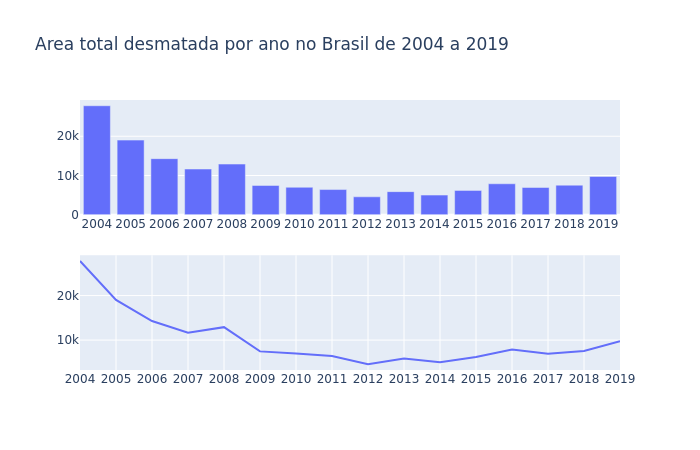

In [6]:
# plotando as áreas totais devastadas através dos anos
fig1 = px.bar(desmatado, x='Anos', y='Total')
fig2 = px.line(desmatado, x="Anos", y="Total")

fig = make_subplots(rows=2, cols=1, shared_xaxes=False, shared_yaxes=False)

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=2, col=1)
fig.update_layout(title_text='Area total desmatada por ano no Brasil de 2004 a 2019')
fig.update_xaxes(tickmode='linear')
fig.show("png")

### **Análise do gráfico**
Em 2004 tivemos um dos maiores registos de desmatamentos da floresta amazônica da história com quase 30 mil km² total desmatado no ano, seguido por 2005 com quase 20 mil km², após isso os números caíram (tendo um pico em 2008) e atingindo o pico mínimo em 2012, nos anos seguintes ouve uma crescida significativa e em 2019 os números voltaram a subir e em comparação aos anos anteriores foi o ano que mais houve desmatamento desde 2008.

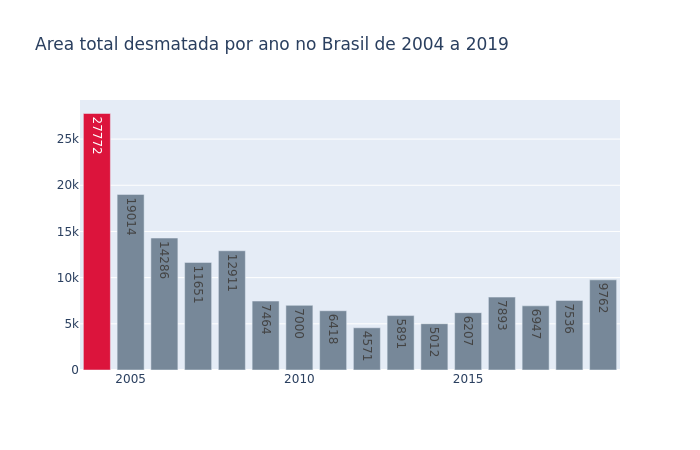

In [7]:
anos = desmatado['Anos']
total = desmatado['Total']
    
colors = ['lightslategray',] * 16
colors[0] = 'crimson'

fig = go.Figure(data=[go.Bar(x=anos, y=total, text=total, textposition='auto', marker_color=colors)])
fig.update_layout(title_text='Area total desmatada por ano no Brasil de 2004 a 2019')

fig.show("png")

### **Valores das áreas totais**

* **2004** foi o ano que houve mais desmatamentos da história com um total de **27.772 km²**

* **2005** foi o segundo ano com mais desmatamentos com um total de **19.014 km²**

* **2008** subiu 10% do ano anterior com **12.911 km²**

* **2012** teve o menor índice de desmatamento com **4.571 km²**

* **2019** foi o ano com mais desmatamentos desde 2008, com **9.762 km²**

### **Por que os números caíram?**

Após o pico histórico de desmatamento em 2004, o governo junto à ONGs e ao setor privado criaram iniciativas para reverter este cenário e em menos de uma década depois, em 2012, atingiu a menor taxa desde o início da série.

### **E por que subiram em 2019?**

Desmontes nas políticas ambientais e cortes nas operações de fiscalização pelo Ibama em 2019 foram as causas para os números voltarem a subir.

Agora que sabemos sobre os anos, vamos ver exatamente quais estados são os mais afetados pelo desmatamento:

In [8]:
# separando os estados para interagir com os gráficos adiante
estados=["Acre","Amazonas","Amapa","Maranhao","Mato Grosso","Para","Rondonia","Roraima","Tocantins"]

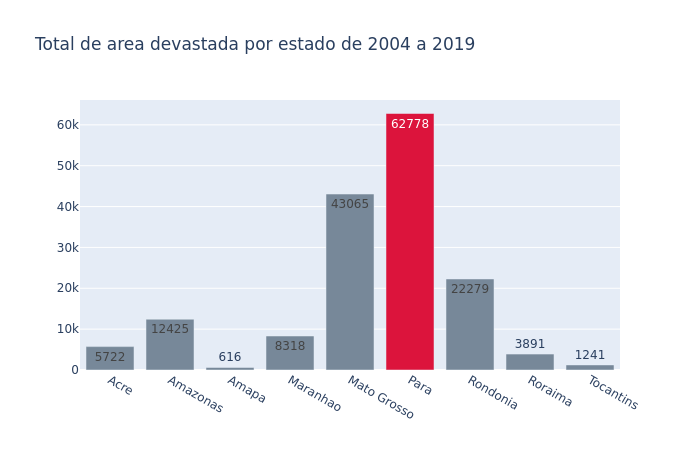

In [9]:
dados1=[]

for i in range(len(estados)):
    dados1.append(desmatado[estados[i]].sum())
    
colores = ['lightslategray',] * 9  # quantidade de colunas no gráfico
colores[5] = 'crimson'  # destacando a maior coluna do gráfico

fig = go.Figure(data=[go.Bar(x=estados, y=dados1, text=dados1, textposition='auto', marker_color=colores)])
fig.update_layout(title_text='Total de area devastada por estado de 2004 a 2019')

fig.show("png")

### **Estados**

No gráfico vemos os nove estados que representam a localização da área desmatada na Floresta Amazônica.

* **Pará** é o estado mais afetado pelos desmatamentos, cerca de **64%** de todo o desmatamento da Floresta Amazônica ocorre neste estado. O motivo vão desde aberturas de estradas como a Transamazônica e a BR-163, a conflitos de terras, ocupações ilegais  e grilagem de terras. E também não podemos esquecer que em 2019 aconteceu o **"dia do fogo"** no qual ruralistas se juntaram para atear fogo na Floresta localizada na cidade de Novo Progresso como forma de protesto.

* **Mato Grosso** seguido por **Rondônia** são os outros dois estados em que acontece o maior número de desmatamento depois do Pará, pelo mesmo motivo.


*Me lembro dos noticiários focando o Amazonas em chamas, o mundo todo engajado e até políticos opinando sobre a preservação e cobrando uma posição do Brasil em relação a isso, e está certo devemos dar atenção, porém o Amazonas não é nem de perto o estado que mais desmata e os dados falam por sí e com um registro de 15 anos*

In [10]:
dados2=[]

for i in range(len(estados)):
    dados2.append(go.Scatter(x = desmatado["Anos"], y = desmatado[estados[i]], mode = "lines+markers", name = estados[i]))

layout = go.Layout(title = "Desmatamento em área (km²)", xaxis = {'title':'Ano', 'range':[2004, 2019],}, yaxis = {'title':'km²'})

fig = go.Figure(data = dados2, layout = layout)

iplot(fig)

### **Área em Km²**

Acima temos uma noção do desmatamento em quilômetros quadrados por estado através dos anos. 

O **Mato Grosso** deu uma queda brusca de 2004 à 2007 (cerda de **87%** de diferença), aumentando um pouco em 2008 mas voltando a cair a partir de 2009 e se manteve. 

**Rondônia** como é o terceiro estado com maior índice de desmatamento no Brasil teve uma queda constante desde 2004 até 2009 (cerca de **88%**) e variou pouco nos anos subsequentes. 

Já o **Pará** reduziu em **40%** no ano de 2005 mantendo até 2008 após isso houve outra queda brusca até atingir  pico mínimo em 2012 (reduziu **70%**) e após isso este número oscilou conforme os anos.

In [11]:
import json
import requests


# transformando latitude e longitude dos estados do Brasil em formato json
url='https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
Brasil = requests.get(url).json()


id_estado = {}

for f in Brasil ["features"]:
    f["id"] = f["properties"]["name"]
    id_estado[f["properties"]["sigla"]] = f["id"]

In [12]:
# criando um novo dataframe para usar a latitude e longitude no gráfio de mapas
estados_att=["Acre","Amazonas","Amapá","Maranhão","Mato Grosso","Pará","Rondônia","Roraima", "Tocantins"]

dados3=[0]*len(estados_att)

for i in range(len(estados)):
    dados3[i]=desmatado[estados[i]].sum()
    
df = {'Estados':estados_att,'Valores':dados3}
    
df_map = pd.DataFrame(df, columns=["Estados", "Valores"])
df_map

,Estados,Valores
0,Acre,5722
1,Amazonas,12425
2,Amapá,616
3,Maranhão,8318
4,Mato Grosso,43065
5,Pará,62778
6,Rondônia,22279
7,Roraima,3891
8,Tocantins,1241


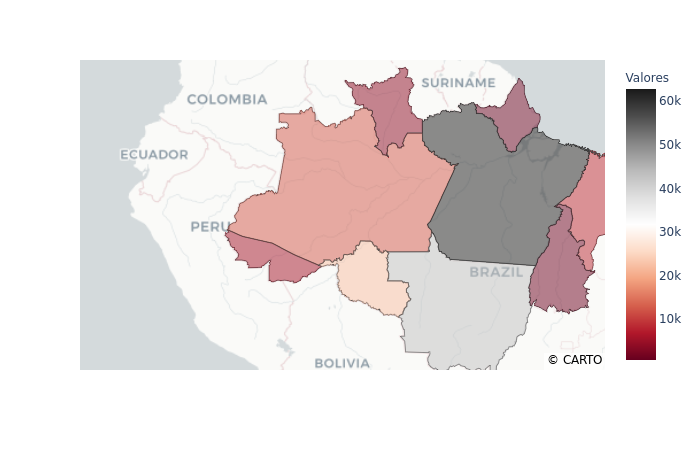

In [13]:
# plotando os estados afetados no gráfico de mapas
fig = px.choropleth_mapbox(df_map, locations = "Estados", geojson = Brasil, color = "Valores", color_continuous_scale="RdGy",
                           mapbox_style = "carto-positron", center={"lat":-6, "lon": -65}, zoom = 3.2, opacity = 0.5)
fig.show("png")

* Um mapa interativo que mostra os estados afetados, separados por grau de desmatamento, o Pará em primeiro lugar representado na cor preta, seguido do Matro Grosso em cinza claro e ao lado esquerdo Rondônia em vermelho mais claro

## **Dados dos incêndios na Floresta Amazônica**

Nesse conjunto de dados vamos analisar os focos de incêndios nos estados mais afetados e calcular a correlação dos incêndios com o desmatamento.

In [14]:
floresta.head()

,year,month,state,latitude,longitude,firespots
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [15]:
# Renomeando as colunas para melhor compreensão no gráfico
floresta.rename({"year": "Anos", "month": "Meses", "state":"Estados", "latitude": "Latitude", "longitude": "Longitude", "firespots": "Incendios"}, axis=1, inplace=True)

floresta.head()

,Anos,Meses,Estados,Latitude,Longitude,Incendios
0,1999,1,AMAZONAS,-2.371113,-59.899933,3
1,1999,1,MARANHAO,-2.257395,-45.487831,36
2,1999,1,MATO GROSSO,-12.660633,-55.057989,18
3,1999,1,PARA,-2.474820,-48.546967,87
4,1999,1,RONDONIA,-12.861700,-60.513100,1


In [16]:
# checando os anos
floresta['Anos'].unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

**Nos dados temos as informações dos estados, anos e meses, os focos de incêndios e a localização pela latitude e longitude (poderemos iterar com eles no mapa real)**

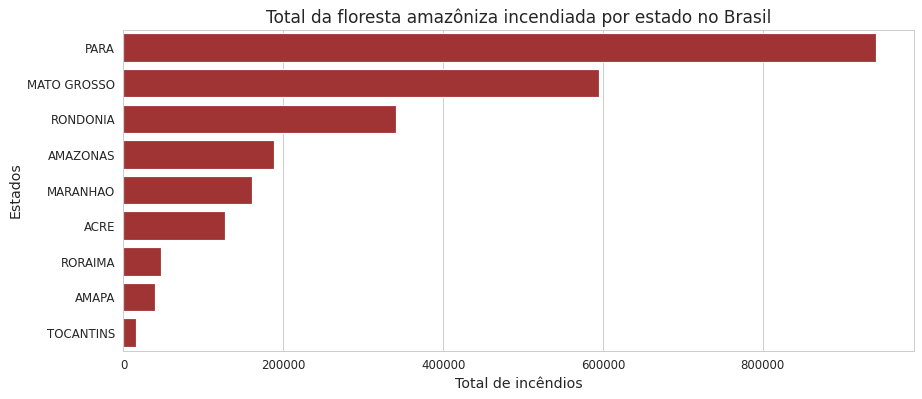

In [17]:
# plotando a quantidade de incêndios na região da floresta separado por estados
amazonica = (floresta[['Estados','Incendios']].groupby('Estados',as_index=False).sum().sort_values('Incendios',ascending=False)['Estados'].values)

plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.barplot(data=floresta, x='Incendios', y='Estados', estimator=sum, color='firebrick', order=amazonica, ci=None)    

plt.ylabel("Estados", size="large")
plt.title("Total da floresta amazôniza incendiada por estado no Brasil", size="x-large")
plt.xlabel("Total de incêndios", size="large");

### **Incêndios totais por estado**

Os estados mais afetados pelos incêndios assemelham-se com os gráficos dos desmatamentos no qual o Pará segue com um número alarmante de casos de incêncios totais na Floresta Amazônica (uma soma por volta de 960.000) seguido pelo Mato Grosso e Rondônia. 

Agora vamos analisar os incêndios no decorrer dos anos.

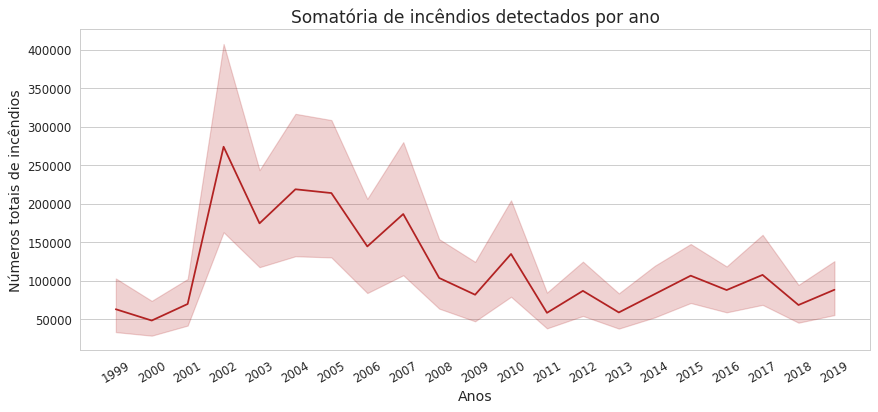

In [18]:
# plotando os incêndios separados por ano
anos = list(range(1999, 2020))
plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.lineplot(data=floresta, x='Anos', y='Incendios', estimator='sum', color="firebrick")

plt.ylabel("Números totais de incêndios", size="large")
plt.xlabel("Anos", size="large")
plt.xticks(anos, rotation=30)
plt.title("Somatória de incêndios detectados por ano", size="x-large")
plt.grid(axis='x')

fig01 = plt.gcf()
fig01.savefig('somatoria_incendios.png', format='png')
plt.show("png")

### **Incêndios totais por ano**

No gráfico acima vemos a relação da soma total de incêndios na Floresta Amazônica por ano entre 1999 e dezembro de 2019.

O maior pico de incêndios aconteceu em 2002 (um crescimento de **76%** em relação ao ano anterior), após isso os números foram caindo a cada ano (salvo 2007 e 2010) até chegar no pico mínimo em 2011, nos anos subsequentes voltaram a subir sutilmente até o final de 2019 (onde os dados extraídos do INPE acabam).

#### **Qual o motivo do grande aumento dos incêndios entre 2001 e 2002?**

"[...]A seca de 2001 foi um prolongamento do período de seca do final da década de 90, que teve uma trégua em 2000. O Rio São Francisco sofreu com a pior falta de chuvas de sua história, causando uma diminuição drástica do volume de suas águas. Para piorar a situação, a falta de chuvas em todo o Brasil contribuiu para a pior crise energética que o país já viveu, somando a estiagem prolongada à falta de investimentos no setor.[...]"  fonte: https://super.abril.com.br/blog/superlistas/os-10-maiores-periodos-de-seca-no-brasil/

In [19]:
# separando os meses para interagir com os gráficos adiante
meses = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho','Julho', 'Augosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']

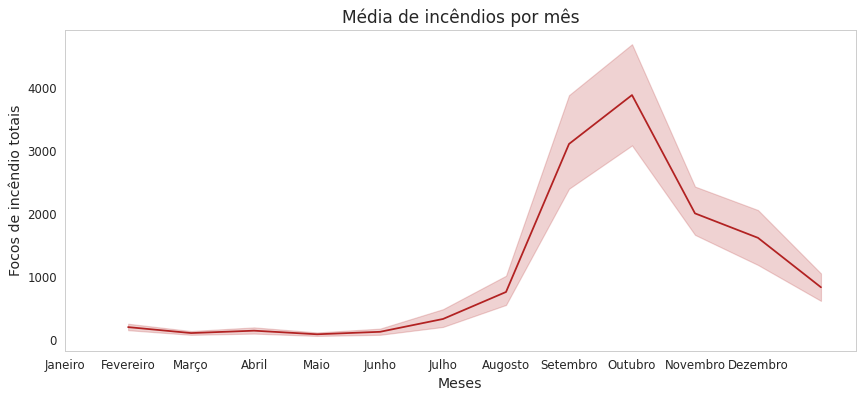

In [20]:
# plotando a quantidade de incêndios por mês
plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

sns.lineplot(data=floresta, x='Meses', y='Incendios', color="firebrick")    

plt.grid(False)
plt.ylabel("Focos de incêndio totais", size="large")
plt.title("Média de incêndios por mês", size="x-large")
plt.xlabel("Meses", size="large")
plt.xticks(ticks=floresta['Meses'].unique()-1, labels=meses);

### **Incêndios totais por mês**

Os incêndios são mais frequentes no **segundo semestre do ano**, nas estações do **inverno** (entre Junho a Setembro) e na **pimavera** (entre Setembro a Dezembro). Nessas duas temporadas o **baixo índice de chuvas** e a **baixa umidade relativa do ar** contribuem para as queimadas aumentarem.

Em suma, com a ação do homem somada ao fator climático da seca, os finais dos anos sempre foram os mais críticos para o meio ambiente.

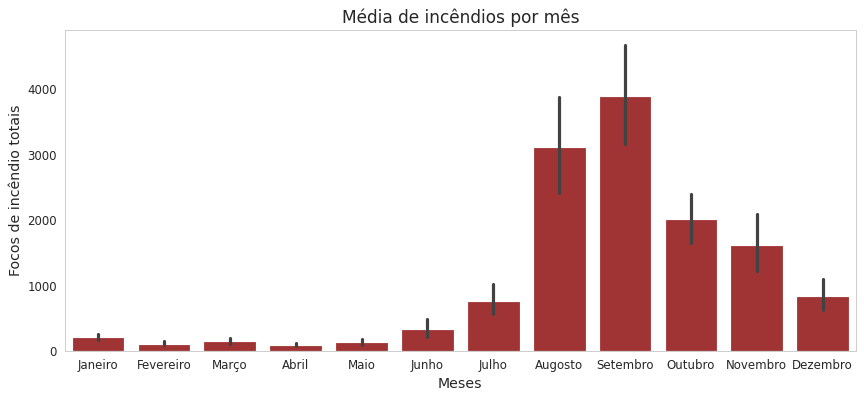

In [21]:
plt.figure(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")
    
sns.barplot(data=floresta, x='Meses', y='Incendios', color="firebrick")

plt.grid(False)
plt.ylabel("Focos de incêndio totais", size="large")
plt.title("Média de incêndios por mês", size="x-large")
plt.xlabel("Meses", size="large")
plt.xticks(ticks=floresta['Meses'].unique()-1, labels=meses);

**Este gráfico tem uma representação diferente da mesma informação do anterior - apenas quis mostrar os dados com outra perspectiva.**

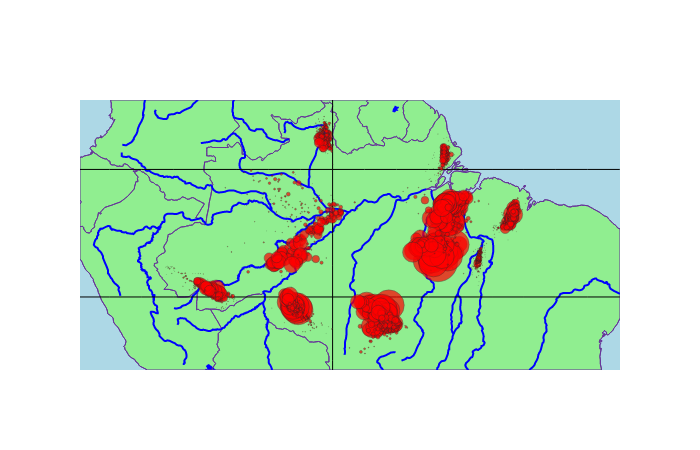

In [22]:
# plotando no mapa os incêndios
fig = go.Figure(data=[go.Scattergeo(lon = floresta['Longitude'], lat = floresta['Latitude'],
        marker = dict(
            size = floresta["Incendios"]/50,
            color = "red",
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
))])

fig.update_geos(
    resolution=50,
    showcoastlines=True, coastlinecolor="RebeccaPurple",
     showland=True, landcolor="LightGreen",
    showocean=True, oceancolor="LightBlue",
     showlakes=True, lakecolor="Blue",
    showrivers=True, rivercolor="Blue", riverwidth=2,
     fitbounds="locations",
     center=dict(lat=-6, lon=-65),
     visible=False,
     showcountries=True, countrycolor="RebeccaPurple",
     showsubunits=True, subunitcolor="Blue",
     lataxis_showgrid=True, lonaxis_showgrid=True, lataxis_gridcolor='Black', lataxis_gridwidth=1, lonaxis_gridcolor='Black', lonaxis_gridwidth=1
)

fig.show("png")

### **No mapa do Brasil**

Para se ter uma idéia da geolocalização dos focos de incêndios totais eu resolvi mostrar no mapa real do Brasil em qual parte de cada estado os focos são maiores. No caso, em uma ordem decrescente começando pelo Pará, depois Mato Grosso e Rondônia.

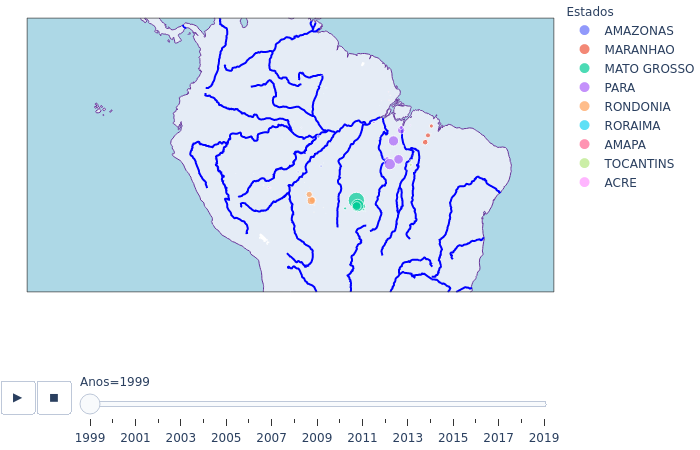

In [23]:
# plotando um play através dos anos
fig = px.scatter_geo(floresta, lon='Longitude', lat='Latitude', color="Estados", size="Incendios", projection="natural earth", animation_frame="Anos")

fig.update_layout(geo = dict(projection_scale=5, center=dict(lat=-6, lon=-65)), height=700, margin=dict(l=0,r=0,b=0,t=0))
fig.update_geos(resolution=50, showcoastlines=True, coastlinecolor="RebeccaPurple", showocean=True, oceancolor="LightBlue", showrivers=True, rivercolor="Blue", riverwidth=2,)

fig.show("png")

**Este mapa achei interessante colocar pois temos um player que mostra a situação das queimadas a cada ano desde 1999 até 2019... Bem intuitivo!** 

## **Comparando a área desmatada com os focos de incêndios**

**Será que estes dados da área desmatada tem alguma correlação aos dados dos incêndios?**

Vamos fazer uma matriz de correlação entre os dados e um gráfico para analisarmos mais afundo.

In [24]:
# reformulando o dataframe das áreas desmatadas
dev_area = pd.melt(desmatado, id_vars=['Anos'], var_name='Estados', value_name='Devastado')
dev_area.head()

,Anos,Estados,Devastado
0,2004,Acre,728
1,2005,Acre,592
2,2006,Acre,398
3,2007,Acre,184
4,2008,Acre,254


In [25]:
# separando o dataset por ano
devastado_ano = dev_area.groupby("Anos", as_index=False).sum()

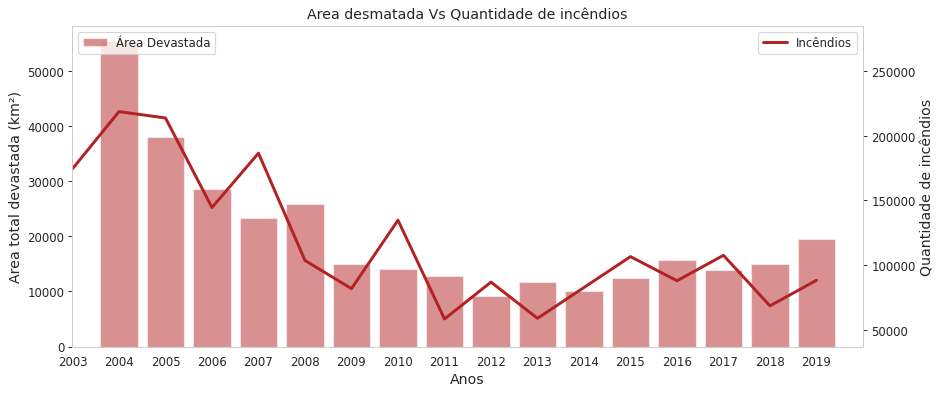

In [26]:
# plotando a area devastada junto da quantidade de incêndios
fig, ax = plt.subplots(figsize=(12,5), dpi=85)
sns.set_style("whitegrid")

ax.bar(devastado_ano['Anos'], devastado_ano['Devastado'], color='firebrick', alpha=0.5, label='Área Devastada')
plt.grid(False)
ax.legend(loc="upper left")
ax.set_ylabel("Area total devastada (km²)", size="large")
ax.set_xlabel("Anos", size="large")
ax.set_title("Area desmatada Vs Quantidade de incêndios")
#ax.grid(axis='x')

ax2 = ax.twinx()
sns.lineplot(x=floresta['Anos'], y=floresta['Incendios'], estimator='sum', color="firebrick", ci=None, ax=ax2, label='Incêndios', lw=2.5)
ax2.set_xticks(ticks=list(range(2003, 2020)))
ax2.set_xlim(2003, 2020)
ax2.set_ylabel("Quantidade de incêndios", size="large")
plt.grid(False)
ax2.legend();

### **Área desmatada vs. Quantidade de Incêndios totais**

Plotando um gráfico sobre o outro observamos uma semelhança entre os dois conjuntos de dados extraídos do INPE, mas **o quão semelhantes eles são?** 

Vamos fazer uma matriz de correlação.

In [27]:
#agupando área devastada por ano
agrup = floresta[floresta['Anos'] > 2003].groupby('Anos').sum() # os dados dos desmatamentos começam em 2004, então foi necessário filtar os dados dos incêndios
agrup['Area'] = devastado_ano.groupby('Anos').sum()['Devastado']

#calculando a correlação
agrup[["Incendios", "Area"]].corr()

,Incendios,Area
Incendios,1.000000,0.833778
Area,0.833778,1.000000


### **Matriz de correlação**

Como esperado, há uma considerável correlação entre os dados dos dois conjuntos (um coeficiente de **83%**), mas também mostra que os incêndios não são os únicos responsáveis pela devastação da Floresta Amazônica, e como mencionei anteriormente a ação do homem é o principal fator crítico para esse caso.

## **Conclusão**

Como base nos dados analisados acima concluímos que:

1.  Os dados dos últimos 15 anos nos mostram que tanto os focos de incêndios quanto a área desmatada **caíram significadamente** do início do segundo milênio para cá tendo picos em 2008, porém os números voltaram a subir consideravelmente em 2019 e é de nossa responsabilidade apoiar ONG's que ajudam no monitoramento e cobrar o governo de voltar a investir nas fiscalizações principalmente nos estados do **Pará, Mato Grosso,e Rondônia** onde os gráficos mostram que 70% do desmatamento total occore nessas regiões.

2.  Os picos de incêndios acontecem mais no **segundo semestre do ano** pois a estiagem e a baixa umidade do ar são fatores responsáveis por ampliar os focos de incêndios contribuindo para a devastação da Floresta Amazônica.

3.  Há uma **correlação de 83%** entre conjuntos de dados dos incêndios com os desmatamentos que extraídos do INPE, mas a ação do homem sempre foi o principal fator responsável, principalmente porque nessas regiões tem muitas disputas de terras e ocupações indevidas das regiões não respeitando as regiões de preservação ambiental.  

Gostaram da análise? Gostaria de um feedback para sempre melhorar minhas habilidades! Logo quero analisar os dados de 2020 para saber como esses números se comportaram na pandemia.